## Heart Prediction Naive Bayes

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
import os
os.chdir("C:/Users/Leal/Documents/M2/data-science-ricco/3/Data_Seance_3/")
#charger les données

data_frame = pd.read_excel("heart-total-modele-bayesien.xls",sheet_name=0)
data_frame
#type de l'objet

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,D,100,234,A,A,156,non,1,1,B,presence
1,41,feminin,B,130,204,A,C,172,non,14,1,A,absence
2,58,masculin,D,150,270,A,C,111,oui,8,1,A,presence
3,53,masculin,D,140,203,B,C,155,oui,31,3,A,presence
4,41,masculin,C,130,214,A,C,168,non,20,2,A,absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,67,masculin,D,120,237,A,A,71,non,10,2,A,presence
266,58,feminin,C,120,340,A,A,172,non,0,1,A,absence
267,46,masculin,C,150,231,A,A,147,non,36,2,A,presence
268,45,masculin,D,104,208,A,C,148,oui,30,2,A,absence


In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_frame["type_douleur"] = labelencoder.fit_transform(data_frame["type_douleur"])
data_frame["electro"] = labelencoder.fit_transform(data_frame["electro"])
data_frame["vaisseau"] = labelencoder.fit_transform(data_frame["vaisseau"])

In [15]:
data_frame = pd.get_dummies(data_frame, columns = ["sexe","sucre","angine","coeur"], drop_first = True)

In [16]:
data_frame.head(15)

,age,type_douleur,pression,cholester,electro,taux_max,depression,pic,vaisseau,sexe_masculin,sucre_B,angine_oui,coeur_presence
0,58,3,100,234,0,156,1,1,1,1,0,0,1
1,41,1,130,204,2,172,14,1,0,0,0,0,0
2,58,3,150,270,2,111,8,1,0,1,0,1,1
3,53,3,140,203,2,155,31,3,0,1,1,1,1
4,41,2,130,214,2,168,20,2,0,1,0,0,0
5,65,2,155,269,0,148,8,1,0,0,0,0,0
6,51,2,110,175,0,123,6,1,0,1,0,0,0
7,45,1,112,160,0,138,0,2,0,0,0,0,0
8,55,1,130,262,0,155,0,1,0,1,0,0,0
9,58,1,136,319,2,152,0,1,2,0,1,0,1


In [17]:
data_frame.describe()

,age,type_douleur,pression,cholester,electro,taux_max,depression,pic,vaisseau,sexe_masculin,sucre_B,angine_oui,coeur_presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,2.174074,131.344444,249.659259,1.022222,149.677778,10.500000,1.585185,0.670370,0.677778,0.148148,0.329630,0.444444
std,9.109067,0.950090,17.861608,51.686237,0.997891,23.165717,11.452098,0.614390,0.943896,0.468195,0.355906,0.470952,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,2.000000,120.000000,213.000000,0.000000,133.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,2.000000,130.000000,245.000000,2.000000,153.500000,8.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,3.000000,140.000000,280.000000,2.000000,166.000000,16.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,2.000000,202.000000,62.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Vérifier la distribution des observations par rapport à la variable à utiliser pour la classification.

In [18]:
print(data_frame.groupby('coeur_presence').size())

coeur_presence
0    150
1    120
dtype: int64


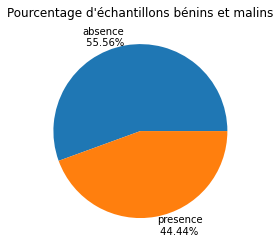

In [19]:
import matplotlib.pyplot as plt
# Graphique circulaire du pourcentage de spécimens bénins et malins.
# Compter les bénins
clases = np.array([data_frame[data_frame.coeur_presence == 0].shape[0], data_frame[data_frame.coeur_presence == 1].shape[0]])

# Creando las leyendas del grafico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'absence\n ' + labels[0]
labels[1] = 'presence\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title("Pourcentage d'échantillons bénins et malins")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


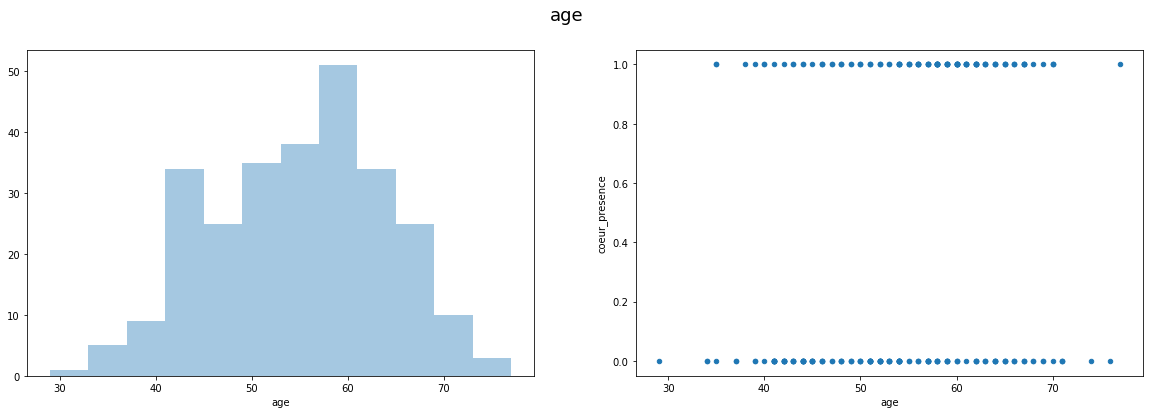

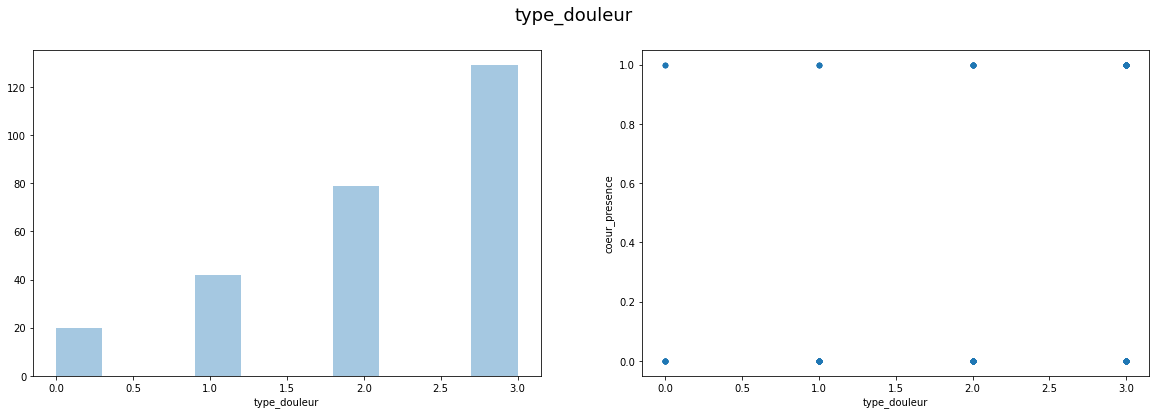

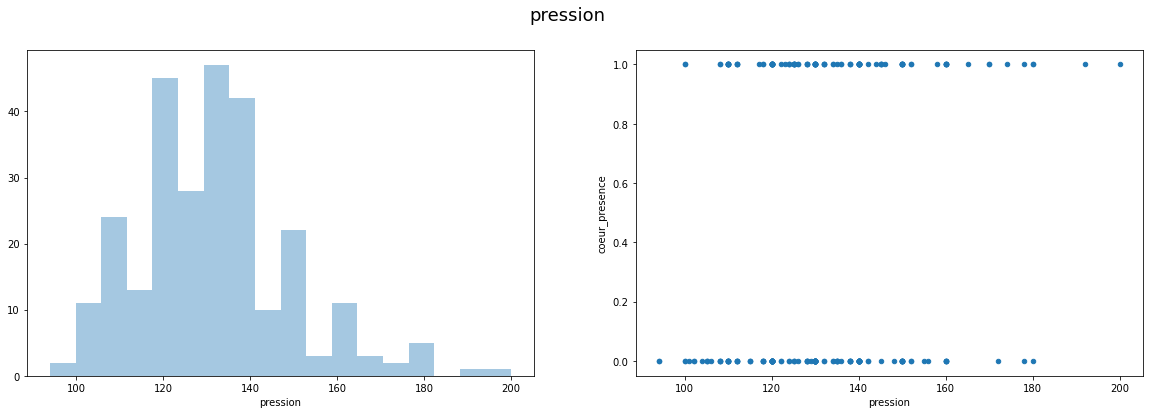

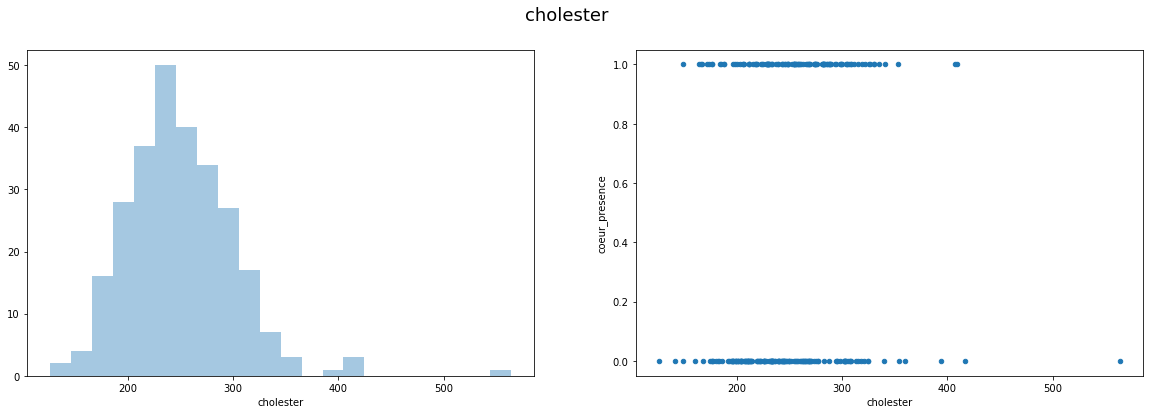

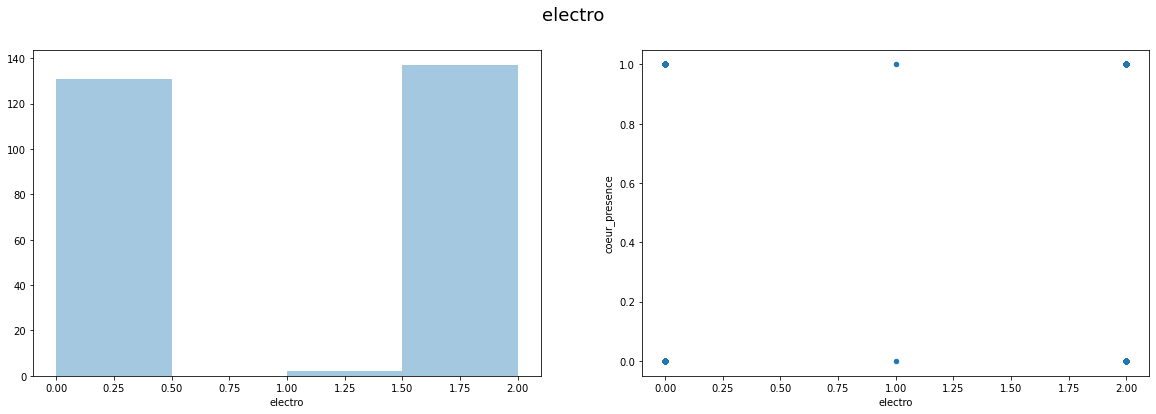

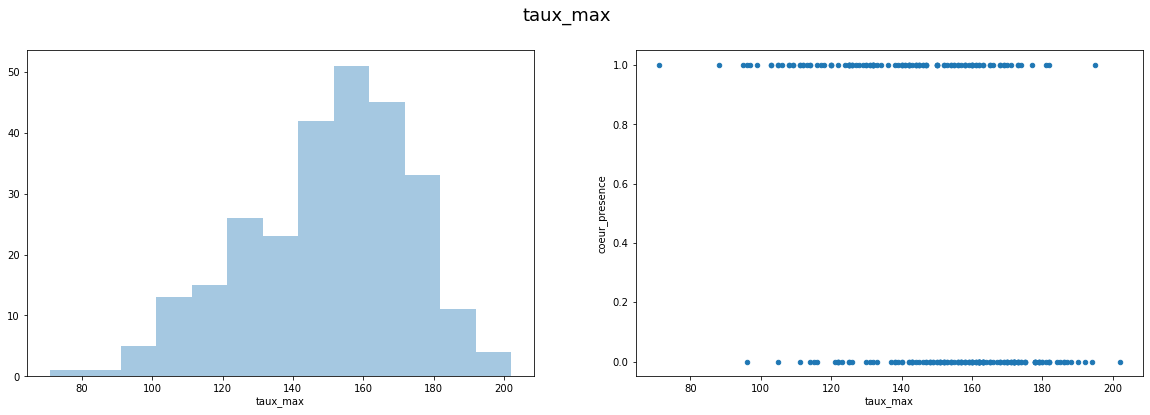

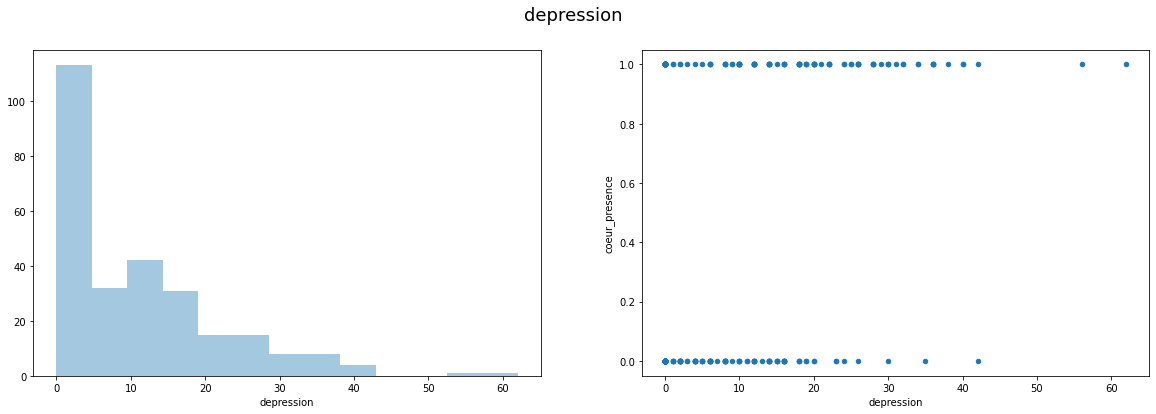

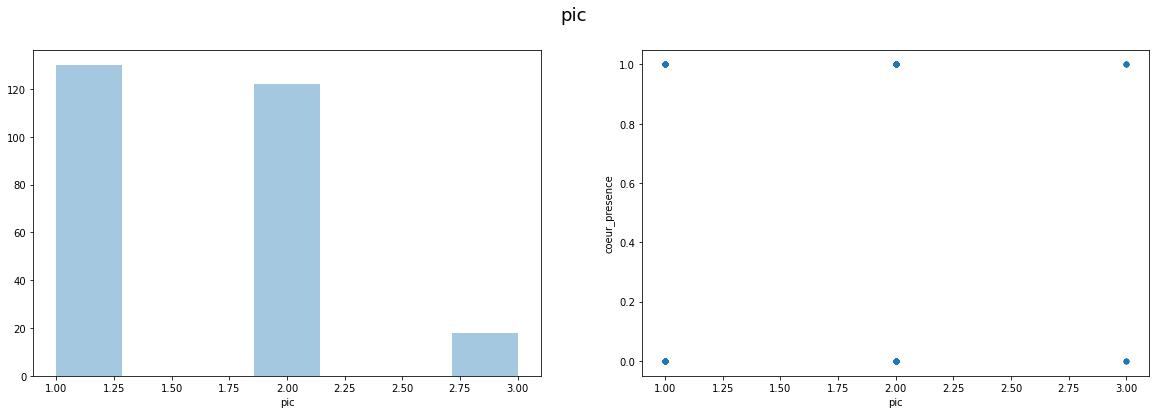

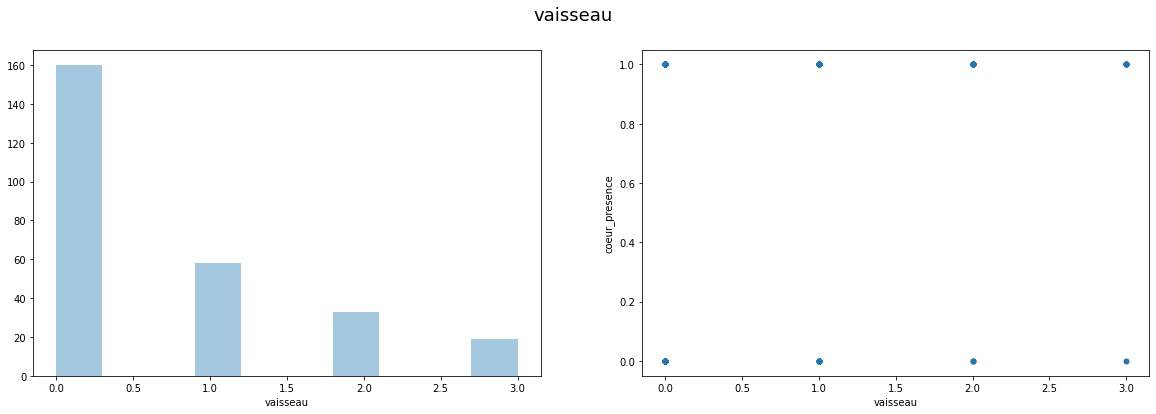

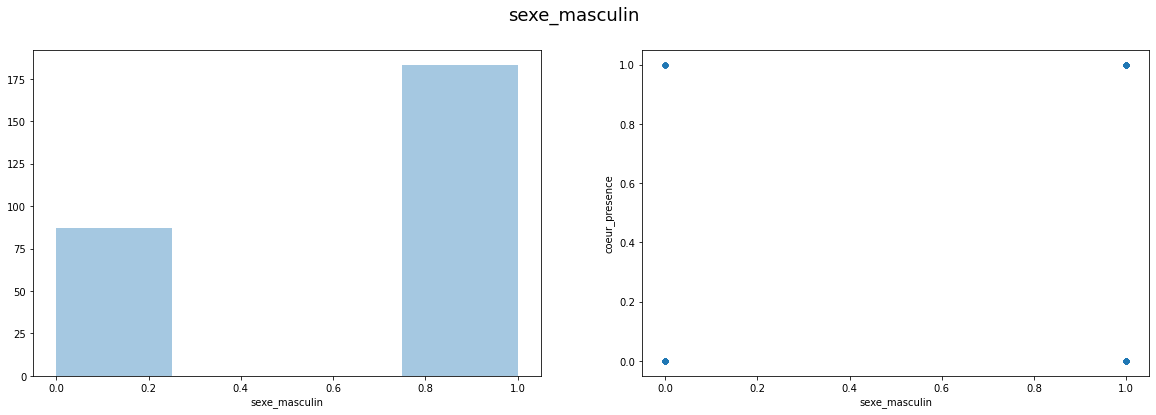

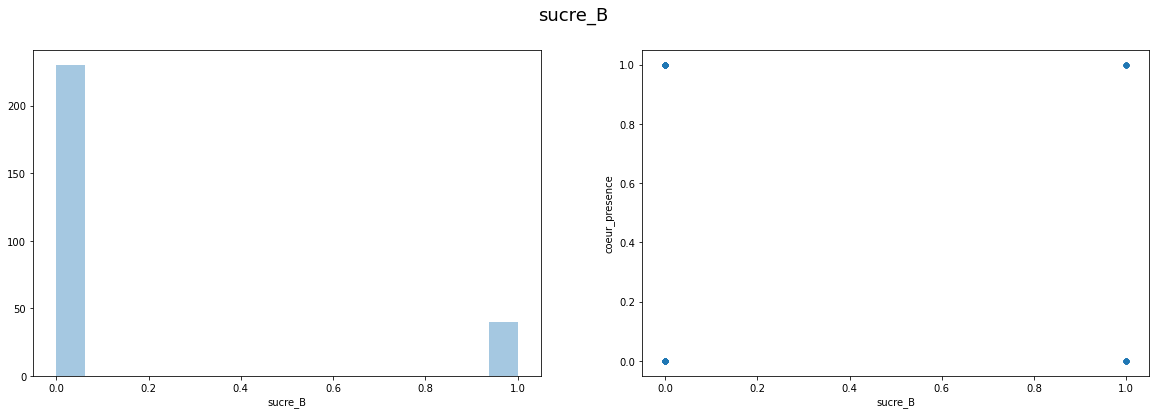

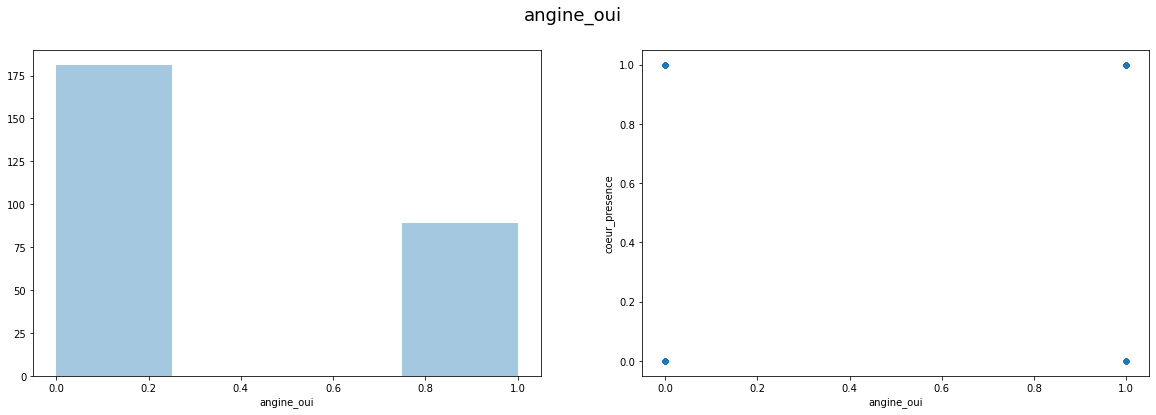

In [20]:
import seaborn as sns
columnas = np.array(data_frame.columns)

for col in columnas[:-1]:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(data_frame[col], ax=ax[0], kde=False)
    data_frame[[col]+['coeur_presence']].plot.scatter(x=col, y='coeur_presence', ax=ax[1])
    plt.show()

## Préparation des données 

In [21]:
# Sélectionnez les variables
X = data_frame.drop(["coeur_presence"],axis=1)

# Sauvegarder l'étiquette
y = data_frame.coeur_presence

## Atelier ML 
Utilisant toutes les variables


$P(absence|donnes) = \frac{P(absence)*P(coeur\_presence / vaisseau, angine, etc|absence)*P(angine|absence)}{P(donnes)}$

$P(presence|donnes) = \frac{P(presence)*P(coeur\_presence\_ vaisseau, angine, etc|absence)*P(vaisseau|absence)}{P(donnes)}$

In [22]:
from sklearn.model_selection import train_test_split

# Séparer les données de "train" en entraînement et en test pour tester les algorithmes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

# Define Naive Bayes
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()

# Entraîner le modèle Machine Learning 
modelo.fit(X_train, y_train)

# Évaluer la qualité du modèle
y_pred = modelo.predict(X_test)

In [23]:
# Evaluation
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matrice de confusion:')
print(matriz)

# Mesurer la performance: precision
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Précision:', precision)

Matrice de confusion:
[[27  7]
 [ 5 15]]
Précision: 0.6818181818181818


## Interprétation des résultats

De la matrice de confusion :

+ 42 données correctement prédites sont obtenues
+ 12 données erronées sont obtenues

In [24]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
print('performance - l’accuracy:',accuracy)
print('performance - F1-Score:',f1_score(y_test, y_pred))
print('performance - Rappel:',recall_score(y_test, y_pred))

performance - l’accuracy: 0.7777777777777778
performance - F1-Score: 0.7142857142857143
performance - Rappel: 0.75


## Bonnus **SelectKBest**

Pour améliorer les résultats avec cet algorithme. Au lieu d'utiliser toutes les colonnes de données d'entrée, une classe SkLearn appelée **SelectKBest** sera utilisée pour sélectionner les 5 meilleures caractéristiques et seules celles-ci seront utilisées pour la modélisation.

In [25]:
from sklearn.feature_selection import SelectKBest
X=data_frame.drop(['coeur_presence'], axis=1)
y=data_frame['coeur_presence']

best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['type_douleur', 'taux_max', 'depression', 'vaisseau', 'angine_oui'], dtype='object')


<AxesSubplot:title={'center':'Corrélation de Pearson'}>

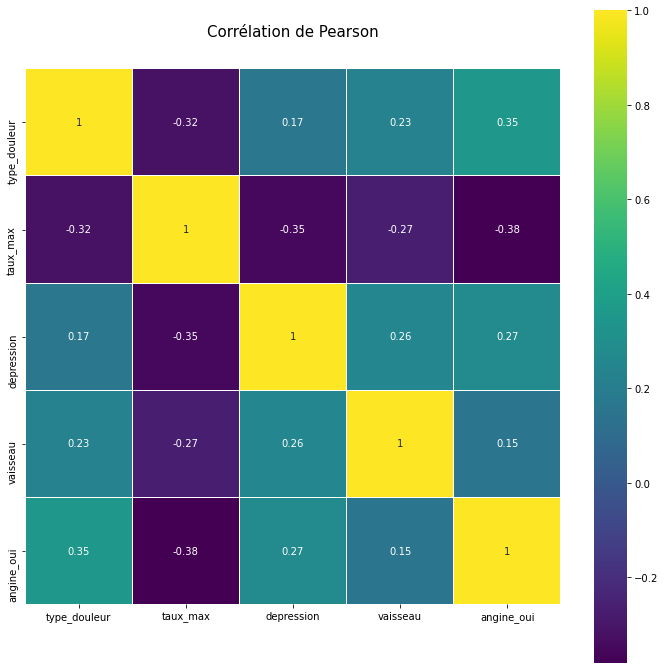

In [26]:
import seaborn as sb
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Corrélation de Pearson', y=1.05, size=15)
sb.heatmap(data_frame[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [27]:
X = data_frame[used_features]
# Séparer les données de "train" en entraînement et en test pour tester les algorithmes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

# Define Naive Bayes
modelo_x = GaussianNB()

# Entraîner le modèle Machine Learning 
modelo_x.fit(X_train, y_train)

# Évaluer la qualité du modèle
y_pred = modelo_x.predict(X_test)

In [28]:
# Evaluation
matriz_x = confusion_matrix(y_test, y_pred)
print('Matrice de confusion:')
print(matriz_x)

# Mesurer la performance: precision
precision = precision_score(y_test, y_pred)
print('Précision:')
print(precision)

Matrice de confusion:
[[28  6]
 [ 4 16]]
Précision:
0.7272727272727273


## Interprétation des résultats

De la matrice de confusion :

+ 44 données correctement prédites sont obtenues
+ 10 données erronées sont obtenues

![ChessUrl](https://media.giphy.com/media/UvzoJj8VBkVtMpsGY9/giphy.gif "chess")